In [1]:
'''
캐글(Kaggle)은 2010년에 설립된 예측모델 및 분석 대회 플랫폼이다. 
기업 및 단체에서 데이터와 해결과제를 등록하면, 데이터 과학자들이 이를 해결하는
모델을 개발하고 경쟁하는 플랫폼. 
2017년 3월에 구글에 인수 되었다. 
'''
#라이브러리 불러오기
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [3]:
import seaborn as sns

In [4]:
font=fm.FontProperties(fname='C:\\Windows\\Fonts\\HMFMMUEX.TTC',size=18).get_name()
rc('font',family=font)
rc('axes',unicode_minus=False)

In [5]:
df_train = pd.read_csv('./data/titanic_train.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.shape

(891, 12)

In [8]:
'''
PassengerId:승객번호
Survived:생존 여부(0 = No, 1 = Yes)-train 데이터에서만 제공
Pclass:좌석 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
Name:이름
Sex:성별
Age:나이
SibSp: 형제 자매 / 배우자 수
Parch:부모와 자식 수(어떤 아이들은 유모와 탑승했으며, 그 결과 0이 있음)
Ticket:티켓 번호
Fare:티켓 요금
Cabin:객실 번호
Embarked:승선한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)
'''
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 결측치 파악하기

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Survived가 1(생존)인 데이타프레임에서 'Sex'컬럼만 선택후 각 성별 카운트
df_train[df_train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [12]:
#그래프로 각 특성(feature)에 대한 생사 여부(Survived) 확인하기
def visualizationCatplot(x,data,kind,hue):#범주형별로 패턴을 보고자할때 사용하는 함수:x는 범주형 y는 수치형
    if kind=='count':
        sns.catplot(x=x,kind=kind,hue=hue,data=data)#countplot는 x나 y중 하나
    else:
        sns.catplot(x=x,y='Survived',kind=kind,hue=hue,data=data)
    plt.show()
def visulaizationLmplot(x,y,hue,data):#두 수치데이타간의 선형회귀 관계 고자할때:하나의 plot x와 y수치형 데이타(선형회귀)
   
    sns.lmplot(x=x,y=y,hue=hue,data=data)
    plt.show()  


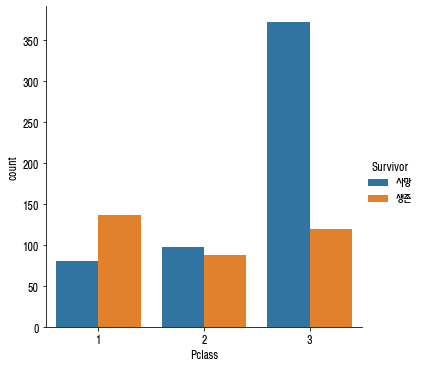

In [13]:
#사망한 사람은 3등석이> 2등석 >1등석 순서이고. 생존한 사람의 경우  1등석이 가장 많다
#df_train에 Survivor컬럼추가
df_train['Survivor']=df_train['Survived'].map({0:'사망',1:'생존'})
visualizationCatplot('Pclass',df_train,kind='count',hue='Survivor')

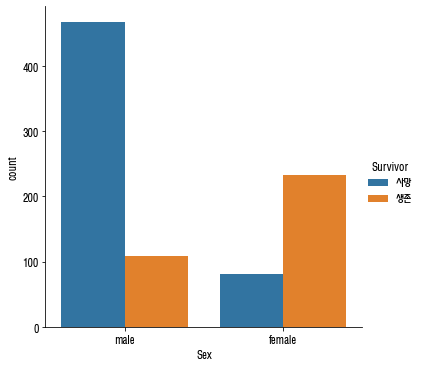

In [14]:
visualizationCatplot('Sex',df_train,kind='count',hue='Survivor')#남자가 사망율이 높다

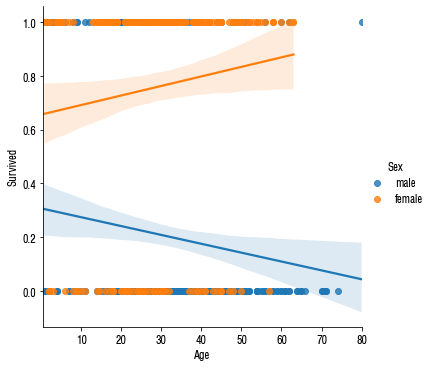

In [15]:
#visualizationCatplot('Age',df_train,kind='strip',hue='Survivor')
visulaizationLmplot(x='Age',y='Survived',hue='Sex',data=df_train)

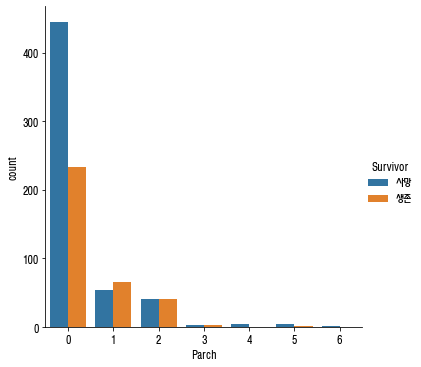

In [16]:
visualizationCatplot('Parch',df_train,kind='count',hue='Survivor')#남자의 경우 부모나 자식이 많을수록 사망율이 낮으며, 여성의 경우 사망율이 높다

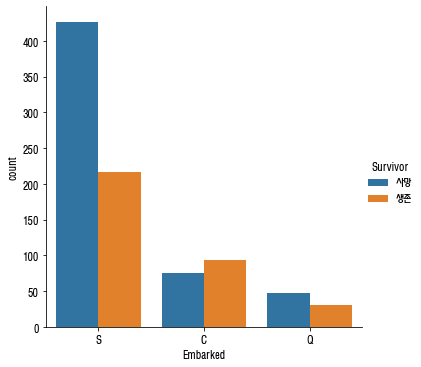

In [17]:
visualizationCatplot('Embarked',df_train,kind='count',hue='Survivor')
#S와 C에서 탑승한 사람이 사망율이 높고 Q는 사망율이 낮다

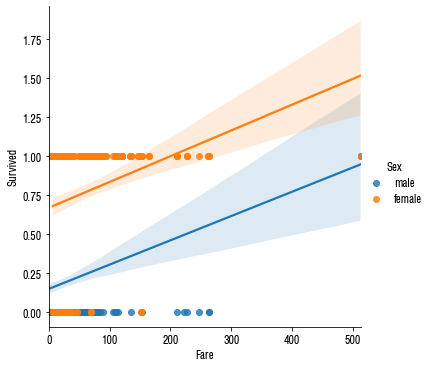

In [18]:
#visualizationCatplot('Fare',df_train,kind='count',hue='Survivor')
visulaizationLmplot(x='Fare',y='Survived',hue='Sex',data=df_train)

In [19]:
def visualization(x,data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    sns.countplot(x=x,data=data,ax=ax[0])
    ax[0].set_title(x+'별 승객수')
    ax[0].set_ylabel('승객수')
    sns.countplot(x=x,data=data,ax=ax[1],hue='Survivor')
    ax[0].set_title(x+':생존자 VS 사망자')
    plt.show()

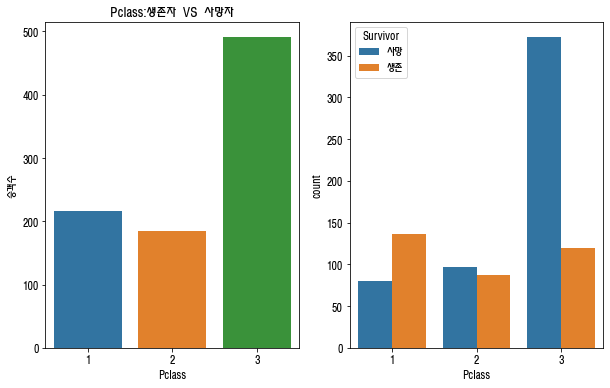

In [20]:
visualization('Pclass',df_train)

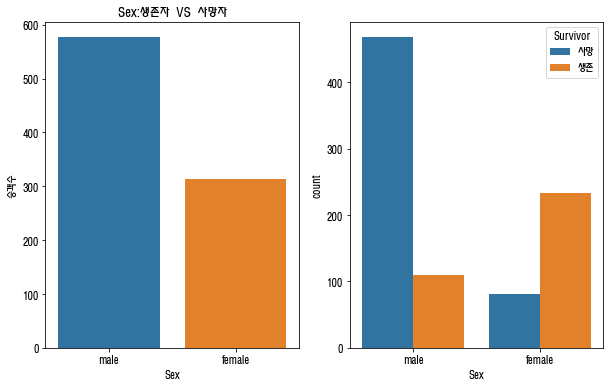

In [21]:
visualization('Sex',df_train)

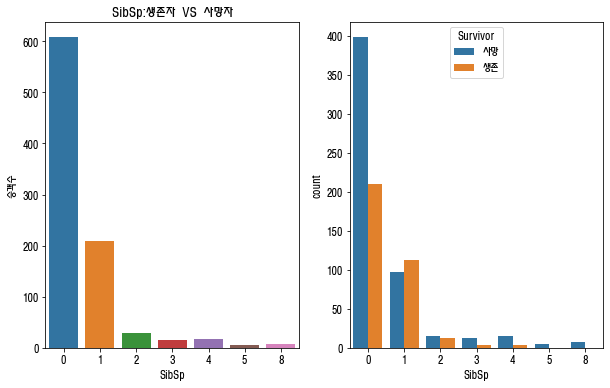

In [22]:
visualization('SibSp',df_train)

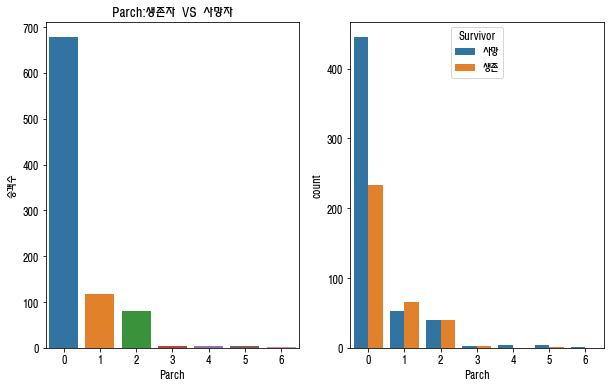

In [23]:
visualization('Parch',df_train)

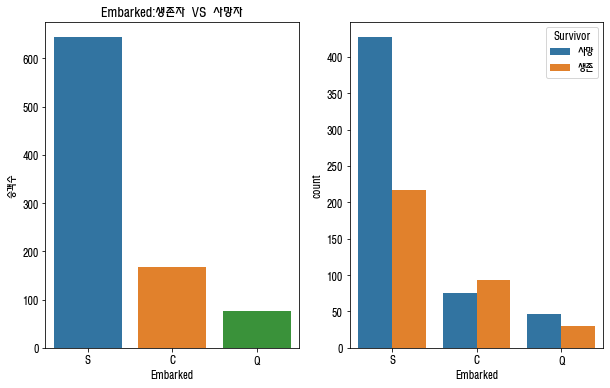

In [24]:
visualization('Embarked',df_train)

In [25]:
'''
1. Cabin과 Ticket 두 컬럼은 삭제.(값이 비어있고 연관성이 없다는 판단하에)
2. Embarked, Name, Sex 값은 숫자로 변경
3. Age의 Null 데이터를 채워 넣기
4. Age의 값의 범위를 줄이기.(큰 범위는 머신러닝 분석시 좋지 않다.(계산량이 많아 속도에 문제가 있음)
5. Fare의 값도 범위를 줄이기
'''
'''
[수치형 데이터 전처리]

각 열(변수, 피처, 속성)이 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 
범위를 일정한 범위로 맞추는 작업

Normalization(정규화) 와 Standardization(표준화)
데이터 분석을 수행하면서 많이 겪는 문제중 하나가 데이터 단위의 불일치임
칼럼간에 데이터의 단위가 다르면 칼럼마다 스케일이 크게 차이가 나게 되고 분석 결과에 영향을 주게 된다.
이를 해결하는 방법으로 Normalization(정규화)과 Standardization(표준화)가 있음
[ 정규화(normalization)]
데이터의 상대적 크기에 대한 영향을 줄이기 위해 데이터범위를 0~1로 변환 - MinMax스케일러라고도 함
2개 이상의 대상 컬럼(변수, 피쳐, 속성)의 단위가 다를 때 대상 데이터를 같은 기준으로 볼 수 있게 함
식 : (측정값 - 최소값) / (최대값 - 최소값)
sklearn.preprocessing의 MinMaxScaler 사용

[표준화(Standardization)] - Z-score 표준화라고도 함
피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환¶
데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 outlier로 간주, 제거
특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 때문에
표준화를 하면 대부분의 경우 성능이 향상
데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법
표준화를 하면 각 데이터들이 평균을 기준으로 얼마나 떨여져 있는지를 나타내는 값으로 변환됨
식(Z-score 표준화) : (측정값 - 평균) / 표준편차


'''


'\n[수치형 데이터 전처리]\n\n각 열(변수, 피처, 속성)이 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 \n범위를 일정한 범위로 맞추는 작업\n\nNormalization(정규화) 와 Standardization(표준화)\n데이터 분석을 수행하면서 많이 겪는 문제중 하나가 데이터 단위의 불일치임\n칼럼간에 데이터의 단위가 다르면 칼럼마다 스케일이 크게 차이가 나게 되고 분석 결과에 영향을 주게 된다.\n이를 해결하는 방법으로 Normalization(정규화)과 Standardization(표준화)가 있음\n[ 정규화(normalization)]\n데이터의 상대적 크기에 대한 영향을 줄이기 위해 데이터범위를 0~1로 변환 - MinMax스케일러라고도 함\n2개 이상의 대상 컬럼(변수, 피쳐, 속성)의 단위가 다를 때 대상 데이터를 같은 기준으로 볼 수 있게 함\n식 : (측정값 - 최소값) / (최대값 - 최소값)\nsklearn.preprocessing의 MinMaxScaler 사용\n\n[표준화(Standardization)] - Z-score 표준화라고도 함\n피쳐의 값들이 평균이 0이고 표준편차가 1인 범위(표준정규분포)에 있도록 변환¶\n데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 outlier로 간주, 제거\n특히 SVM이나 선형회귀, 로지스틱 회귀 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를때 성능이 좋은 모델이기 때문에\n표준화를 하면 대부분의 경우 성능이 향상\n데이터를 0을 중심으로 양쪽으로 데이터를 분포시키는 방법\n표준화를 하면 각 데이터들이 평균을 기준으로 얼마나 떨여져 있는지를 나타내는 값으로 변환됨\n식(Z-score 표준화) : (측정값 - 평균) / 표준편차\n\n\n'

## 데이타 전처리

In [26]:
y_train_test=df_train['Survived']#정답 분리

In [27]:
y_train_test

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
#'Survived','Survivor' 두 개 컬럼 삭제
df_train.drop(['Survived','Survivor'],axis=1,inplace=True)

In [29]:
#이름 전처리하기
#이름의 타이틀을 통해 승객의 성별이나 나이대, 결혼 유무를 알 수가 있다.
#각 타이틀의 평균값으로 null인 Age값을 채우자
'''
Don / Dona: = sir(상류층)
Mme : Madame
Capt : Captain
Lady : 상류층 숙녀
the Countess : Countess(여자 백작)
mlle : Mademoiselle
Jonkheer : 낮은 직급의 귀족
Rev : 목사/신부
Col : 군인 관련
Master : Master는 뜻이 많다.
Major : 소령
'''

'\nDon / Dona: = sir(상류층)\nMme : Madame\nCapt : Captain\nLady : 상류층 숙녀\nthe Countess : Countess(여자 백작)\nmlle : Mademoiselle\nJonkheer : 낮은 직급의 귀족\nRev : 목사/신부\nCol : 군인 관련\nMaster : Master는 뜻이 많다.\nMajor : 소령\n'

In [30]:
#이름에서 Mr,MiSS등만 가져와서 리스트로 변환
name_title=list(df_train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()).unique())

In [31]:
name_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [32]:
df_train['name_title']=df_train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [33]:
#분류가 너무 많으므로 비슷한 것끼리 묶어서 줄이자
name_title={'Mr':'Mr','Mrs':'Mrs','Miss':'Miss','Master':'Rare','Don':'Royal','Rev':'Rare','Dr':'Rare','Mme':'Mrs','Ms':'Miss','Major':'Rare','Lady':'Royal','Sir':'Royal','Mlle':'Miss','Col':'Rare','Capt':'Rare','the Countess':'Royal','Jonkheer':'Rare'}

In [34]:
df_train['name_title']=df_train['name_title'].map(name_title)

In [35]:
df_train['name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare', 'Royal'], dtype=object)

In [36]:
#name_title로 그룹화해서  Age평균 구하기
df_train.groupby('name_title')['Age'].mean()

name_title
Miss     21.845638
Mr       32.368090
Mrs      35.788991
Rare     18.456852
Royal    42.500000
Name: Age, dtype: float64

In [37]:
#위에서 구한 평균값으로 Age가 NaN인 데이타 채우기
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Mr'),'Age']=32
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Rare'),'Age']=18
df_train.loc[(df_train.Age.isnull()) & (df_train['name_title']=='Royal'),'Age']=43

In [38]:
df_train['Age'].isnull().sum()

0

In [39]:
#Embarked 결측치는 S로 채우자.왜냐하면 가장 빈도수가 높은 값이다
df_train['Embarked']=df_train['Embarked'].fillna('S')

In [40]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
name_title       0
dtype: int64

In [41]:
#Fare와 Pclass 컬럼 사이에는 연관성이 있음으로 Pclass하나만 사용
df_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'name_title'],
      dtype='object')

In [42]:
#학습시 제외할 Feature Drop하기
df_train.drop(['PassengerId','Name','Ticket','Fare','Cabin','name_title'],axis=1,inplace=True)

In [43]:
df_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [44]:
df_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [45]:
#Sex 숫자로 변경:레이블 인코딩과 같다
df_train['Sex']=df_train['Sex'].map({'male':1,'female':0})

In [46]:
df_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,S
1,1,0,38.0,1,0,C
2,3,0,26.0,0,0,S
3,1,0,35.0,1,0,S
4,3,1,35.0,0,0,S


In [47]:
#Embarked는 더미화(원핫 인코딩)
embarked_dummies=pd.get_dummies(df_train['Embarked'],prefix='Embarked')

In [48]:
embarked_dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [49]:
df_train=pd.concat([df_train,embarked_dummies],axis=1)

In [50]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,S,0,0,1
1,1,0,38.0,1,0,C,1,0,0
2,3,0,26.0,0,0,S,0,0,1
3,1,0,35.0,1,0,S,0,0,1
4,3,1,35.0,0,0,S,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,S,0,0,1
887,1,0,19.0,0,0,S,0,0,1
888,3,0,22.0,1,2,S,0,0,1
889,1,1,26.0,0,0,C,1,0,0


In [51]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,S,0,0,1
1,1,0,38.0,1,0,C,1,0,0
2,3,0,26.0,0,0,S,0,0,1
3,1,0,35.0,1,0,S,0,0,1
4,3,1,35.0,0,0,S,0,0,1


In [62]:
df_train.drop('Embarked',axis=1,inplace=True)

In [63]:
#훈련데이타와 테스트 데이타로 다시 나누기
#훈련용 데이타
X_train = df_train.iloc[:713]
y_train=y_train_test.iloc[:713]

In [64]:
#테스트 데이타
X_test = df_train.iloc[713:]
y_test =y_train_test.iloc[713:]

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn import metrics

In [67]:
def fit_predict(model,algorithm,X_train,y_train,X_test,y_test):
    #훈련데이타로 모델 학습시키기
    model.fit(X_train,y_train)
    #학습된 모델로 새로운 데이타(테스트 데이타)로 예측
    y_pred=model.predict(X_test)#예측한 데이타
    #맞힌 개수와 정답레이블 갯수로 수식 이용해서 정확도 계산하기: 수동으로 계산
    print((y_test == y_pred).sum()/ len(y_pred) * 100,'%',sep='')
    #사이킷런의 함수 사용해서 정확도 계산
    accuracy = metrics.accuracy_score(y_test,y_pred)
    print('학습 알고리즘 : ',algorithm,' 정확도 : ',accuracy,'%',sep='')    
    

In [70]:
lr =LogisticRegression(max_iter=500)#모델 생성  . max_iter 디폴트는 100 수렴하지 못했다고 경고 뜸

In [71]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [72]:
y_pred=lr.predict(X_test)

In [73]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [74]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print('학습 알고리즘 : 로지스틱 리그레션 정확도 : ',accuracy,'%',sep='')    

학습 알고리즘 : 로지스틱 리그레션 정확도 : 0.8370786516853933%


In [75]:
y_test.shape

(178,)

In [76]:
fit_predict(SVC(max_iter=500),'서포트 백터 머신',X_train,y_train,X_test,y_test)

67.97752808988764%
학습 알고리즘 : 서포트 백터 머신 정확도 : 0.6797752808988764%


In [79]:
fit_predict(RandomForestClassifier(n_estimators=500),'랜덤포레스트',X_train,y_train,X_test,y_test)

85.39325842696628%
학습 알고리즘 : 랜덤포레스트 정확도 : 0.8539325842696629%
